In [1]:
%matplotlib inline
from pathlib import Path

datasets_path = Path("../datasets")

In [2]:
import polars as pl
import polars.selectors as cs

train_csv_path = datasets_path / "train.csv"
test_csv_path = datasets_path / "test.csv"

train_df = pl.read_csv(train_csv_path).with_columns(pl.col("charges").cast(pl.Utf8))
test_df = pl.read_csv(test_csv_path)

In [3]:
train_df.describe()

shape: (9, 9)
┌────────────┬───────────┬───────────┬────────┬───┬──────────┬────────┬───────────┬─────────┐
│ statistic  ┆ id        ┆ age       ┆ sex    ┆ … ┆ children ┆ smoker ┆ region    ┆ charges │
│ ---        ┆ ---       ┆ ---       ┆ ---    ┆   ┆ ---      ┆ ---    ┆ ---       ┆ ---     │
│ str        ┆ f64       ┆ f64       ┆ str    ┆   ┆ f64      ┆ str    ┆ str       ┆ str     │
╞════════════╪═══════════╪═══════════╪════════╪═══╪══════════╪════════╪═══════════╪═════════╡
│ count      ┆ 1600.0    ┆ 1600.0    ┆ 1600   ┆ … ┆ 1600.0   ┆ 1600   ┆ 1600      ┆ 1600    │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0      ┆ … ┆ 0.0      ┆ 0      ┆ 0         ┆ 0       │
│ mean       ┆ 1007.8625 ┆ 38.985    ┆ null   ┆ … ┆ 1.014375 ┆ null   ┆ null      ┆ null    │
│ std        ┆ 575.26841 ┆ 13.555012 ┆ null   ┆ … ┆ 1.259031 ┆ null   ┆ null      ┆ null    │
│ min        ┆ 0.0       ┆ 18.0      ┆ female ┆ … ┆ 0.0      ┆ no     ┆ northeast ┆ 0       │
│ 25%        ┆ 516.0     ┆ 27.0      ┆ null   ┆ … ┆ 0.0      ┆ null   ┆ null      ┆ null    │
│ 50%        ┆ 1011.0    ┆ 40.0      ┆ null   ┆ … ┆ 1.0      ┆ null   ┆ null      ┆ null    │
│ 75%        ┆ 1509.0    ┆ 50.0      ┆ null   ┆ … ┆ 2.0      ┆ null   ┆ null      ┆ null    │
│ max        ┆ 1999.0    ┆ 64.0      ┆ male   ┆ … ┆ 5.0      ┆ yes    ┆ southwest ┆ 2       │
└────────────┴───────────┴───────────┴────────┴───┴──────────┴────────┴───────────┴─────────┘

In [4]:
test_df.describe()

shape: (9, 8)
┌────────────┬────────────┬───────────┬────────┬───────────┬──────────┬────────┬───────────┐
│ statistic  ┆ id         ┆ age       ┆ sex    ┆ bmi       ┆ children ┆ smoker ┆ region    │
│ ---        ┆ ---        ┆ ---       ┆ ---    ┆ ---       ┆ ---      ┆ ---    ┆ ---       │
│ str        ┆ f64        ┆ f64       ┆ str    ┆ f64       ┆ f64      ┆ str    ┆ str       │
╞════════════╪════════════╪═══════════╪════════╪═══════════╪══════════╪════════╪═══════════╡
│ count      ┆ 400.0      ┆ 400.0     ┆ 400    ┆ 400.0     ┆ 400.0    ┆ 400    ┆ 400       │
│ null_count ┆ 0.0        ┆ 0.0       ┆ 0      ┆ 0.0       ┆ 0.0      ┆ 0      ┆ 0         │
│ mean       ┆ 966.05     ┆ 39.23     ┆ null   ┆ 32.668659 ┆ 0.9425   ┆ null   ┆ null      │
│ std        ┆ 585.848127 ┆ 12.990149 ┆ null   ┆ 5.9328    ┆ 1.219801 ┆ null   ┆ null      │
│ min        ┆ 13.0       ┆ 18.0      ┆ female ┆ 21.848978 ┆ 0.0      ┆ no     ┆ northeast │
│ 25%        ┆ 432.0      ┆ 28.0      ┆ null   ┆ 28.712189 ┆ 0.0      ┆ null   ┆ null      │
│ 50%        ┆ 972.0      ┆ 40.0      ┆ null   ┆ 32.288571 ┆ 0.0      ┆ null   ┆ null      │
│ 75%        ┆ 1458.0     ┆ 50.0      ┆ null   ┆ 37.110462 ┆ 2.0      ┆ null   ┆ null      │
│ max        ┆ 1995.0     ┆ 64.0      ┆ male   ┆ 46.890354 ┆ 5.0      ┆ yes    ┆ southwest │
└────────────┴────────────┴───────────┴────────┴───────────┴──────────┴────────┴───────────┘

## ydata-profiling

In [5]:
from ydata_profiling import ProfileReport

train_profile = ProfileReport(
    train_df.to_pandas(), title="Train data profile", explorative=True
)
test_profile = ProfileReport(
    test_df.to_pandas(), title="Train data profile", explorative=True
)

In [6]:
train_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
test_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## PairPlot

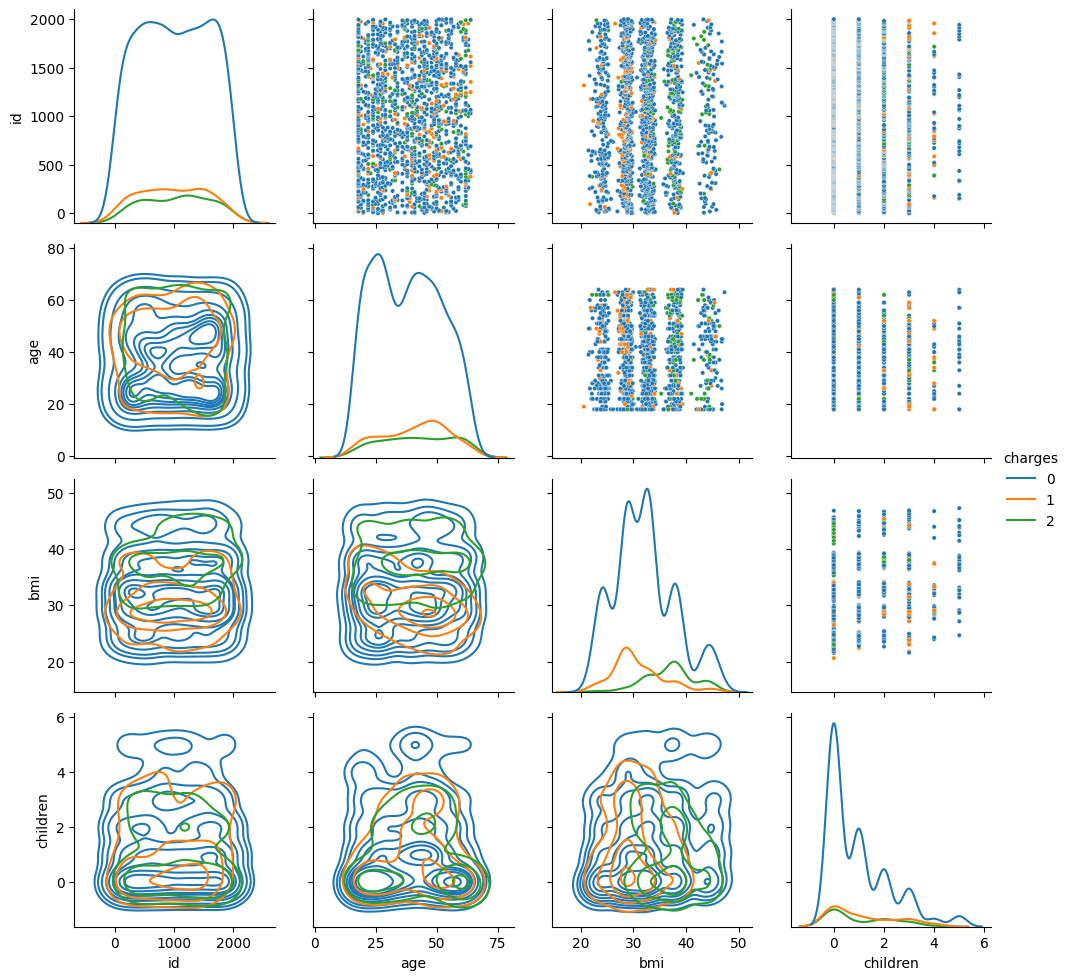

In [12]:
import seaborn as sns

g = sns.PairGrid(train_df.to_pandas(), diag_sharey=False, hue="charges")
g.map_upper(sns.scatterplot, s=10)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

g

## chargesとの分布確認

In [18]:
train_df.describe()

shape: (9, 9)
┌────────────┬───────────┬───────────┬────────┬───┬──────────┬────────┬───────────┬─────────┐
│ statistic  ┆ id        ┆ age       ┆ sex    ┆ … ┆ children ┆ smoker ┆ region    ┆ charges │
│ ---        ┆ ---       ┆ ---       ┆ ---    ┆   ┆ ---      ┆ ---    ┆ ---       ┆ ---     │
│ str        ┆ f64       ┆ f64       ┆ str    ┆   ┆ f64      ┆ str    ┆ str       ┆ str     │
╞════════════╪═══════════╪═══════════╪════════╪═══╪══════════╪════════╪═══════════╪═════════╡
│ count      ┆ 1600.0    ┆ 1600.0    ┆ 1600   ┆ … ┆ 1600.0   ┆ 1600   ┆ 1600      ┆ 1600    │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0      ┆ … ┆ 0.0      ┆ 0      ┆ 0         ┆ 0       │
│ mean       ┆ 1007.8625 ┆ 38.985    ┆ null   ┆ … ┆ 1.014375 ┆ null   ┆ null      ┆ null    │
│ std        ┆ 575.26841 ┆ 13.555012 ┆ null   ┆ … ┆ 1.259031 ┆ null   ┆ null      ┆ null    │
│ min        ┆ 0.0       ┆ 18.0      ┆ female ┆ … ┆ 0.0      ┆ no     ┆ northeast ┆ 0       │
│ 25%        ┆ 516.0     ┆ 27.0      ┆ null   ┆ … ┆ 0.0      ┆ null   ┆ null      ┆ null    │
│ 50%        ┆ 1011.0    ┆ 40.0      ┆ null   ┆ … ┆ 1.0      ┆ null   ┆ null      ┆ null    │
│ 75%        ┆ 1509.0    ┆ 50.0      ┆ null   ┆ … ┆ 2.0      ┆ null   ┆ null      ┆ null    │
│ max        ┆ 1999.0    ┆ 64.0      ┆ male   ┆ … ┆ 5.0      ┆ yes    ┆ southwest ┆ 2       │
└────────────┴───────────┴───────────┴────────┴───┴──────────┴────────┴───────────┴─────────┘

<Axes: xlabel='age', ylabel='charges'>

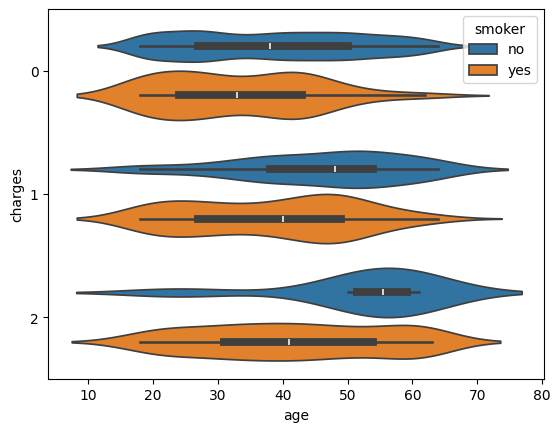

In [27]:
sns.violinplot(train_df.to_pandas(), x="age", y="charges", hue="smoker")

<Axes: xlabel='sex', ylabel='charges'>

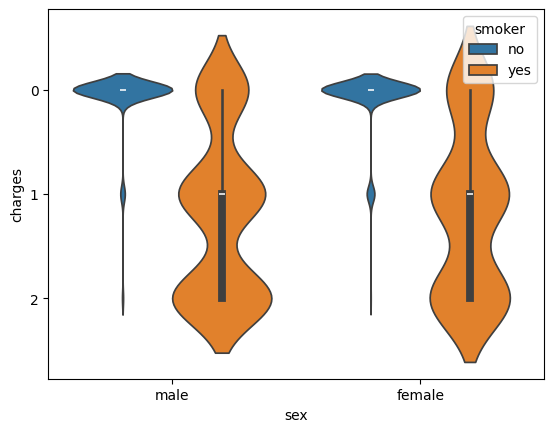

In [28]:
sns.violinplot(train_df.to_pandas(), x="sex", y="charges", hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

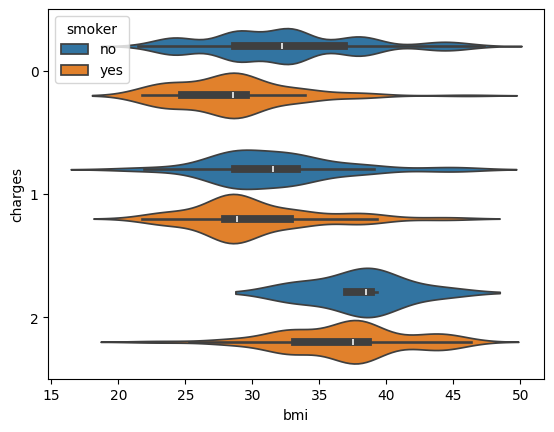

In [17]:
sns.violinplot(train_df.to_pandas(), x="bmi", y="charges", hue="smoker")

<Axes: xlabel='children', ylabel='charges'>

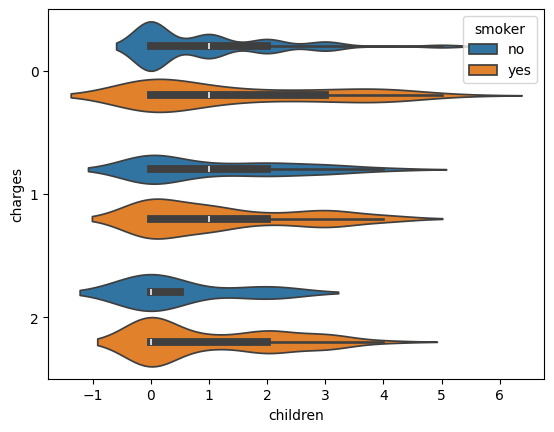

In [22]:
sns.violinplot(train_df.to_pandas(), x="children", y="charges", hue="smoker")

<Axes: xlabel='smoker', ylabel='charges'>

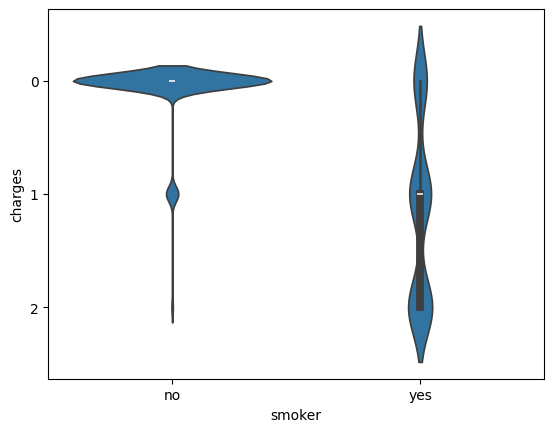

In [24]:
sns.violinplot(train_df.to_pandas(), x="smoker", y="charges")

<Axes: xlabel='region', ylabel='charges'>

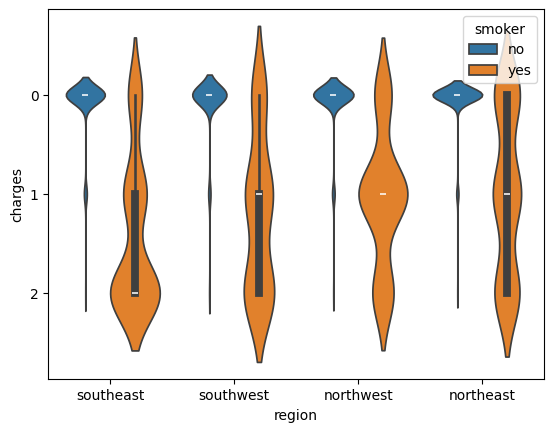

In [23]:
sns.violinplot(train_df.to_pandas(), x="region", y="charges", hue="smoker")

`smoker`と`bmi`が顕著に影響していそう。`age`も若干影響があるかも  

それ以外の`sex`,`children`,`region`はあまり関係がなさそうに見える